# Project 1 - Statistical Inference (DIZON, TANG, TEE)
In this notebook, we will be exploring on the data from **MyAnimeList** which consists of anime-related data. We will be focusing on analyzing statistical-related inferences.

## numpy, pandas, and matplotlib
To start, we will be first importing the libraries that will be used to help us analyze the given data. The following libraries will be used:

1.   **Numpy** - sgjsgjkskgkj
2.   **Pandas** - sgjsjgsjkgjks
3.  **Matplotlib** -amnfklhslgkla


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset

Next, we will be moving on to importing `anime_list` csv file. This will be the dataset that we will be working on. It contains over 23 variables (columns) and 18,162 observations (rows). Some of the variables will be ommitted from what we will be analyzing.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gavindizon/CSMODEL/main/Project%201%20-%20Statistical%20Inference/csv/anime_list.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      18162 non-null  int64  
 1   title       18162 non-null  object 
 2   synopsis    18162 non-null  object 
 3   background  18162 non-null  object 
 4   aired       18162 non-null  object 
 5   airing      18162 non-null  int64  
 6   duration    18162 non-null  object 
 7   episodes    18162 non-null  int64  
 8   type        18162 non-null  object 
 9   favorites   18162 non-null  int64  
 10  members     18162 non-null  int64  
 11  rank        18162 non-null  float64
 12  popularity  18162 non-null  int64  
 13  score       18162 non-null  float64
 14  scored_by   18162 non-null  int64  
 15  rating      18162 non-null  object 
 16  premiered   18162 non-null  object 
 17  genres      18095 non-null  object 
 18  related     18162 non-null  object 
 19  status      18162 non-nul

## Data Cleaning

Before analyzing the data, we will first clean the data. Here, we will remove the uneeded variables and variables with null values. Although, some of the variables that have null values but with the proper context (e.g. Not Applicable) will be represented with a uniform sentinel value instead of removing the whole column.

In [ ]:
# Removes the unwanted variables
df.drop(['background', 'mal_id', 'synopsis', 'related'], 1, inplace=True)
#Convert raw data types to their necessary datatypes
df['rank'] = df['rank'].astype(int)
df = df.dropna(subset= ['genres'], how= 'any')

Check if there are missing datas

In [ ]:
df.isnull().any()

title         False
aired         False
airing        False
duration      False
episodes      False
type          False
favorites     False
members       False
rank          False
popularity    False
score         False
scored_by     False
rating        False
premiered     False
genres        False
status        False
licensors     False
producers     False
studios       False
dtype: bool

In [ ]:
df.head(5)

,title,aired,airing,duration,episodes,type,favorites,members,rank,popularity,score,scored_by,rating,premiered,genres,status,licensors,producers,studios
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999",0,24 min per ep,26,TV,59968,1366272,32,44,8.77,661519,R - 17+ (violence & profanity),Spring 1998,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Finished Airing,"Funimation, Bandai Entertainment",Bandai Visual,Sunrise
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001",0,1 hr 55 min,1,Movie,1063,291258,163,542,8.39,168515,R - 17+ (violence & profanity),-,"Action, Drama, Mystery, Sci-Fi, Space",Finished Airing,Sony Pictures Entertainment,"Sunrise, Bandai Visual",Bones
2,Trigun,"Apr 1, 1998 to Sep 30, 1998",0,24 min per ep,26,TV,11882,591134,285,213,8.23,288760,PG-13 - Teens 13 or older,Spring 1998,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Finished Airing,"Funimation, Geneon Entertainment USA",Victor Entertainment,Madhouse
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002",0,25 min per ep,26,TV,512,97700,2508,1535,7.27,37135,PG-13 - Teens 13 or older,Summer 2002,"Action, Mystery, Police, Supernatural, Drama, ...",Finished Airing,"Funimation, Bandai Entertainment","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005",0,23 min per ep,52,TV,10,13576,3769,4514,6.97,5463,PG - Children,Fall 2004,"Adventure, Fantasy, Shounen, Supernatural",Finished Airing,-,"TV Tokyo, Dentsu",Toei Animation


## Creating a sample

In [ ]:
n = 60 # sample size
sample_df = df.sample(n, random_state=8)
sample_df.head()

,title,aired,airing,duration,episodes,type,favorites,members,rank,popularity,score,scored_by,rating,premiered,genres,status,licensors,producers,studios
9702,Ehon Yose,2006 to 2008,0,5 min per ep,50,TV,0,282,14652,14223,-1.00,-1,PG - Children,-,"Historical, Horror, Kids",Finished Airing,-,Pony Canyon,-
15329,Yuuki no Hana ga Hiraku Toki: Yanase Takashi t...,"Feb 10, 2019",0,55 min,1,Special,0,156,13764,16248,-1.00,-1,G - All Ages,-,"Drama, Kids",Finished Airing,-,-,"TMS Entertainment, Echoes"
14463,Kirari Kagayaku,"Mar 29, 2017",0,10 min,1,ONA,0,241,7184,14814,6.26,109,G - All Ages,-,"Music, Romance, Slice of Life",Finished Airing,-,-,-
12471,Mary to Majo no Hana,"Jul 8, 2017",0,1 hr 42 min,1,Movie,111,73785,2491,1869,7.27,39226,G - All Ages,-,"Adventure, Fantasy, Magic",Finished Airing,GKIDS,"Khara, Dentsu, Yomiuri Telecasting, Toho, Nipp...",Studio Ponoc
8462,Soul Eater NOT!,"Apr 9, 2014 to Jul 2, 2014",0,23 min per ep,12,TV,175,175488,8600,927,5.94,83703,PG-13 - Teens 13 or older,Spring 2014,"Action, Comedy, Ecchi, Shounen, Supernatural",Finished Airing,Funimation,"TV Tokyo, Dentsu, Square Enix, Sony Music Comm...",Bones


# Relation between score and number of favorites
### Is there a correlation between the number of favorites of an anime to it's score?

Checking unique values of scores

In [ ]:
df.value_counts("score")

score
-1.00    5296
 6.63      75
 6.26      74
 6.45      72
 7.06      69
         ... 
 3.78       1
 3.77       1
 3.76       1
 3.73       1
 9.17       1
Length: 535, dtype: int64

Checking unique values of favorites

In [ ]:
df.value_counts("favorites")

favorites
0         5955
1         1885
2         1013
3          702
4          521
          ... 
1379         1
1380         1
1387         1
1391         1
175658       1
Length: 1523, dtype: int64

Remove those with -1.00 score

In [ ]:
temp_df = df.drop(df[df['score'] == -1.00].index)
temp_df.value_counts("score")

score
6.63    75
6.26    74
6.45    72
6.23    69
7.06    69
        ..
3.76     1
3.73     1
3.68     1
3.67     1
9.17     1
Length: 534, dtype: int64

Pearson r correlation between favorites and score

In [ ]:
temp_df['favorites'].corr(temp_df['score'])

0.24191416337453162

Scatter Plot for the relation between favorites and scores.

<AxesSubplot:xlabel='favorites', ylabel='score'>

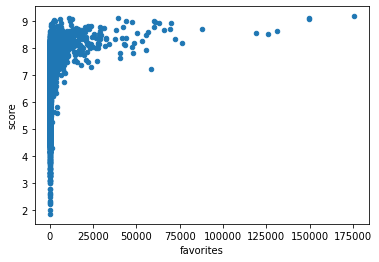

In [ ]:
temp_df.plot.scatter('favorites', 'score')

# Relation between Producer and Studio to score

### Exploratory data analysis

Let us check the average score of each producer

In [ ]:
mean_df = df.groupby("producers").agg({"score": ["mean"]})
mean_df.sort_values(("score", "mean"), ascending=False)

,score
,mean
producers,
"Aniplex, Square Enix, Mainichi Broadcasting System, Studio Moriken",9.17
"TV Tokyo, Aniplex, Dentsu",9.09
"Kitty Films, K-Factory, Kitty Film Mitaka Studio",9.06
"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Miracle Robo, Studio Jack, Shueisha",9.06
"TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",9.04
...,...
"Nippon Television Network, DandeLion Animation Studio",-1.00
"Fuji TV, P Productions",-1.00


In [ ]:
type_count_df = df['producers'].value_counts()
type_count_df

-                                                                                          8151
NHK                                                                                         628
Pink Pineapple                                                                              189
Sanrio                                                                                      161
Bandai Visual                                                                               118
                                                                                           ... 
Madhouse, VAP, Dentsu, Yomiuri Telecasting, Kadokawa Shoten, Toho, Hiroshima Television       1
TV Tokyo, King Records, Techno Sound                                                          1
TV Tokyo, Milky Cartoon                                                                       1
Sotsu, Nomad, Bushiroad, Chrono Gear Creative, Bushiroad Music                                1
Half H.P Studio, Nikkatsu               